In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset_p1 = 'model/keypoint_classifier/keypoint_part1.csv'
dataset_p2 = 'model/keypoint_classifier/keypoint_part2.csv'
dataset_p3 = 'model/keypoint_classifier/keypoint_part3.csv'
model_save_path = 'model/keypoint_classifier/alpha_clf.hdf5'

In [3]:
NUM_CLASSES = 26

In [4]:
X_dataset1 = np.loadtxt(dataset_p1, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset1 = np.loadtxt(dataset_p1, delimiter=',', dtype='int32', usecols=(0))

In [5]:
X_dataset2 = np.loadtxt(dataset_p2, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset2 = np.loadtxt(dataset_p2, delimiter=',', dtype='int32', usecols=(0))
y_dataset2 = y_dataset2+10

In [11]:
X_dataset3 = np.loadtxt(dataset_p3, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset3 = np.loadtxt(dataset_p3, delimiter=',', dtype='int32', usecols=(0))
y_dataset3 = y_dataset3+20

In [19]:
concat_x = np.concatenate((X_dataset1,X_dataset2),axis=0)
concat_x = np.concatenate((concat_x,X_dataset3),axis=0)

In [20]:
concat_y = np.concatenate((y_dataset1,y_dataset2),axis=0)
concat_y = np.concatenate((concat_y,y_dataset3),axis=0)
print(concat_y.shape)

(2967,)


In [21]:
concat_x.shape

(2967, 42)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(concat_x, concat_y, train_size=0.75, random_state=RANDOM_SEED)

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [26]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1720      
_________________________________________________________________
dropout_3 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_5 (Dense)              (None, 26)                806       
Total params: 3,756
Trainable params: 3,756
Non-trainable params: 0
_________________________________________________________________


In [27]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [28]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

======================] - 0s 10ms/step - loss: 0.6260 - accuracy: 0.7802 - val_loss: 0.1964 - val_accuracy: 0.9852

Epoch 00226: saving model to model/keypoint_classifier\alpha_clf.hdf5
Epoch 227/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.6339 - accuracy: 0.7844 - val_loss: 0.2048 - val_accuracy: 0.9704

Epoch 00227: saving model to model/keypoint_classifier\alpha_clf.hdf5
Epoch 228/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.6003 - accuracy: 0.7795 - val_loss: 0.1961 - val_accuracy: 0.9771

Epoch 00228: saving model to model/keypoint_classifier\alpha_clf.hdf5
Epoch 229/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.5770 - accuracy: 0.7933 - val_loss: 0.1966 - val_accuracy: 0.9798

Epoch 00229: saving model to model/keypoint_classifier\alpha_clf.hdf5
Epoch 230/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.6265 - accuracy: 0.7870 - val_loss: 0.1964 - val_accuracy: 0.9811

Epoch 00230: saving mode

In [30]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9798


In [31]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [32]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[3.4985277e-01 1.0745974e-04 8.2451498e-07 8.0110767e-05 9.1139591e-06
 3.7738771e-06 1.5820197e-07 6.3327706e-04 2.2451715e-05 2.5172081e-05
 2.3239494e-10 1.8478168e-10 7.7446702e-11 7.2586173e-11 1.5704307e-10
 1.0359403e-10 4.4370638e-10 3.8946676e-10 1.1257966e-10 7.0532968e-11
 2.2741060e-03 6.1290121e-01 3.4086682e-02 2.8269214e-06 1.3686134e-09
 2.2331330e-08]
21


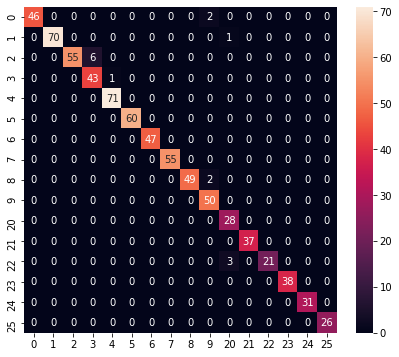

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       1.00      0.99      0.99        71
           2       1.00      0.90      0.95        61
           3       0.88      0.98      0.92        44
           4       0.99      1.00      0.99        71
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        55
           8       1.00      0.96      0.98        51
           9       0.93      1.00      0.96        50
          20       0.88      1.00      0.93        28
          21       1.00      1.00      1.00        37
          22       1.00      0.88      0.93        24
          23       1.00      1.00      1.00        38
          24       1.00      1.00      1.00        31
          25       1.00      1.00      1.00        26

    accuracy                           0.98       742
   m

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite

In [34]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [35]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/alpha_clf.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\LAPTOP~1\AppData\Local\Temp\tmptzjxwvhz\assets


8416

In [36]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [37]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [38]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [39]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 2.36 ms


In [40]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.5452247e-01 1.0898571e-04 8.2036621e-07 7.3600160e-05 9.3638782e-06
 3.7210332e-06 1.4782027e-07 6.2996434e-04 2.2291286e-05 2.6794480e-05
 2.2813518e-10 1.7536161e-10 7.5322172e-11 7.0934980e-11 1.5375309e-10
 1.0157168e-10 4.2755038e-10 3.8340503e-10 1.1011170e-10 6.9636512e-11
 2.2658289e-03 6.0953522e-01 3.2798070e-02 2.6595790e-06 1.3648225e-09
 2.1177215e-08]
21
